In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

In [3]:
data.head()

,x1,x2,y
0,1.689767,-1.408241,1.0
1,1.530287,-1.459848,1.0
2,-1.175042,-1.447633,0.0
3,-2.585395,0.963532,0.0
4,1.372246,0.440695,1.0


__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [4]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

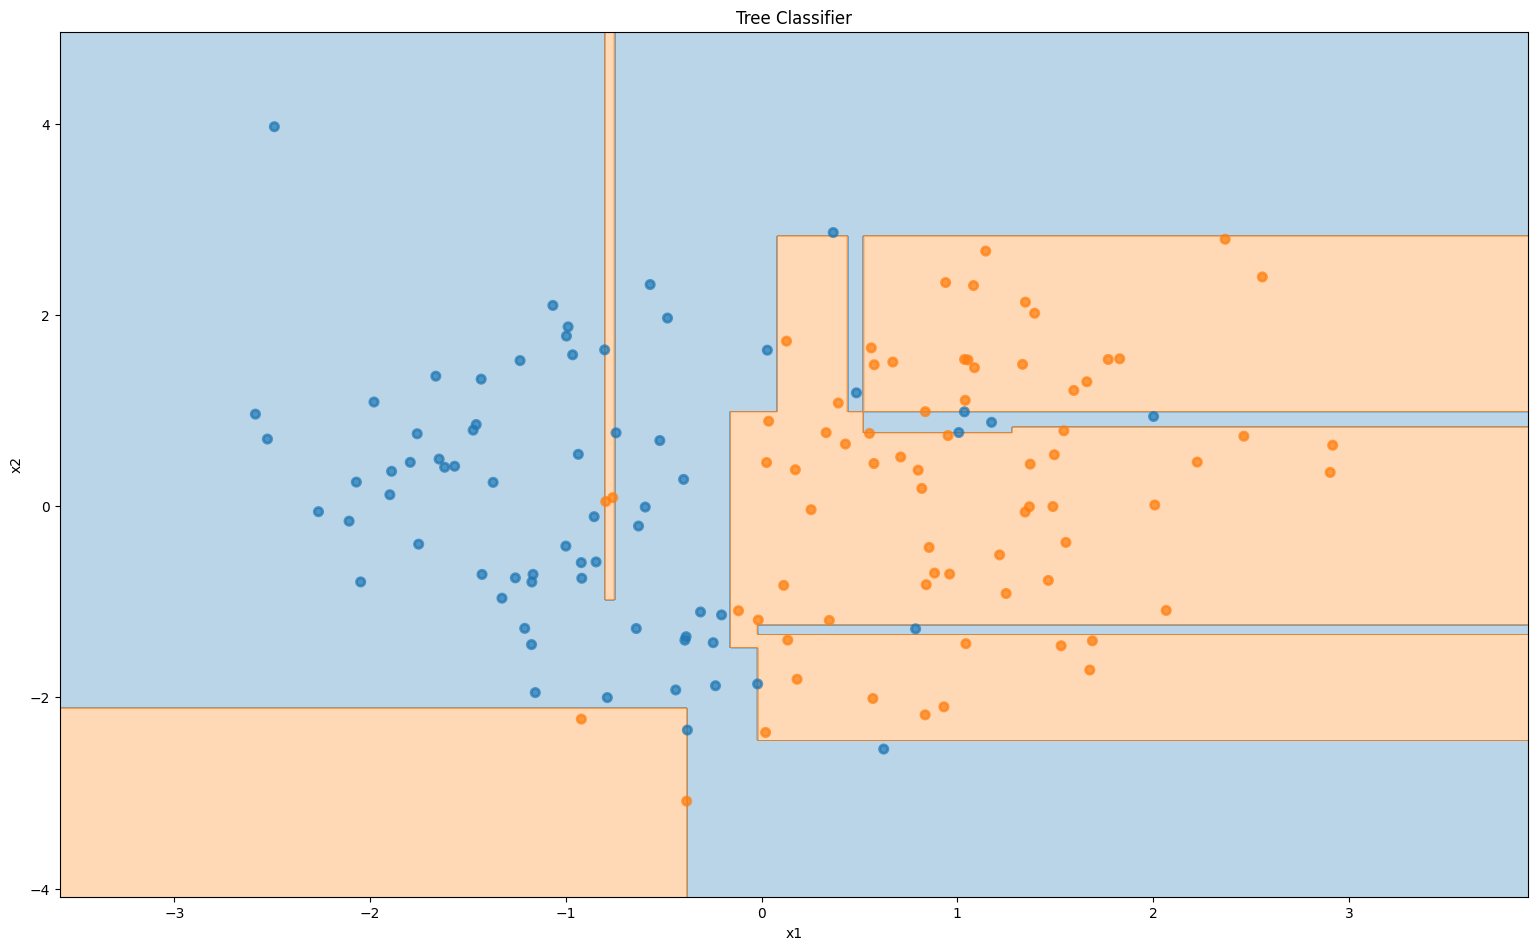

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here
tree = DecisionTreeClassifier().fit(X_train, y_train)
fig = plt.figure(figsize = (16, 10))
plt.title('Tree Classifier')
plt.xlabel('x1')
plt.ylabel('x2')
plot_surface(tree, X_train, y_train)


In [7]:
from sklearn.metrics import accuracy_score
print(f'Train accuracy: {accuracy_score(y_train, tree.predict(X_train)).round(1)}')
print(f'Test accuracy: {accuracy_score(y_test, tree.predict(X_test)).round(1)}')

Train accuracy: 1.0
Test accuracy: 0.8


__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [8]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)

    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)

    plt.legend(loc = 'lower right', prop={'size': 20})

In [9]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state = 42)

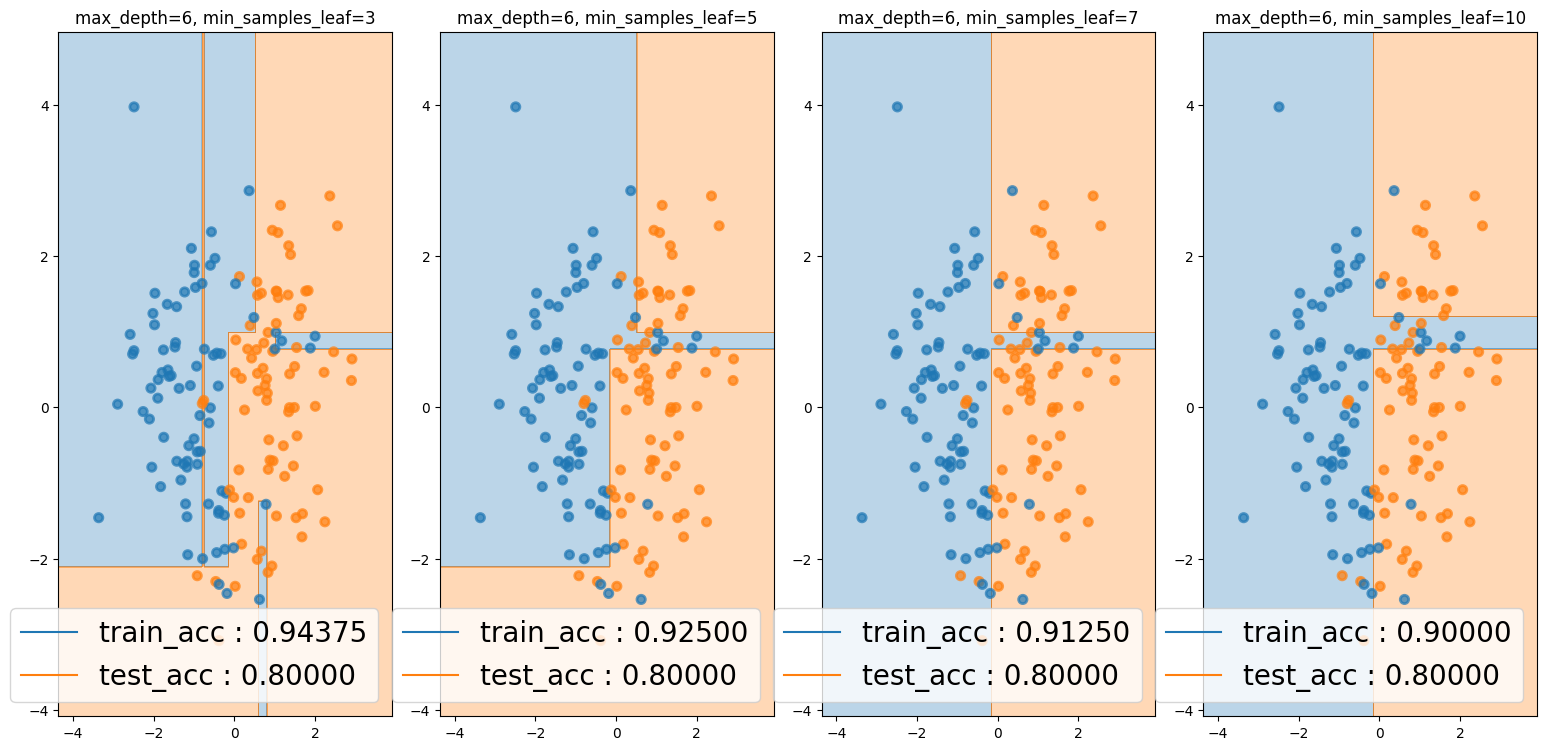

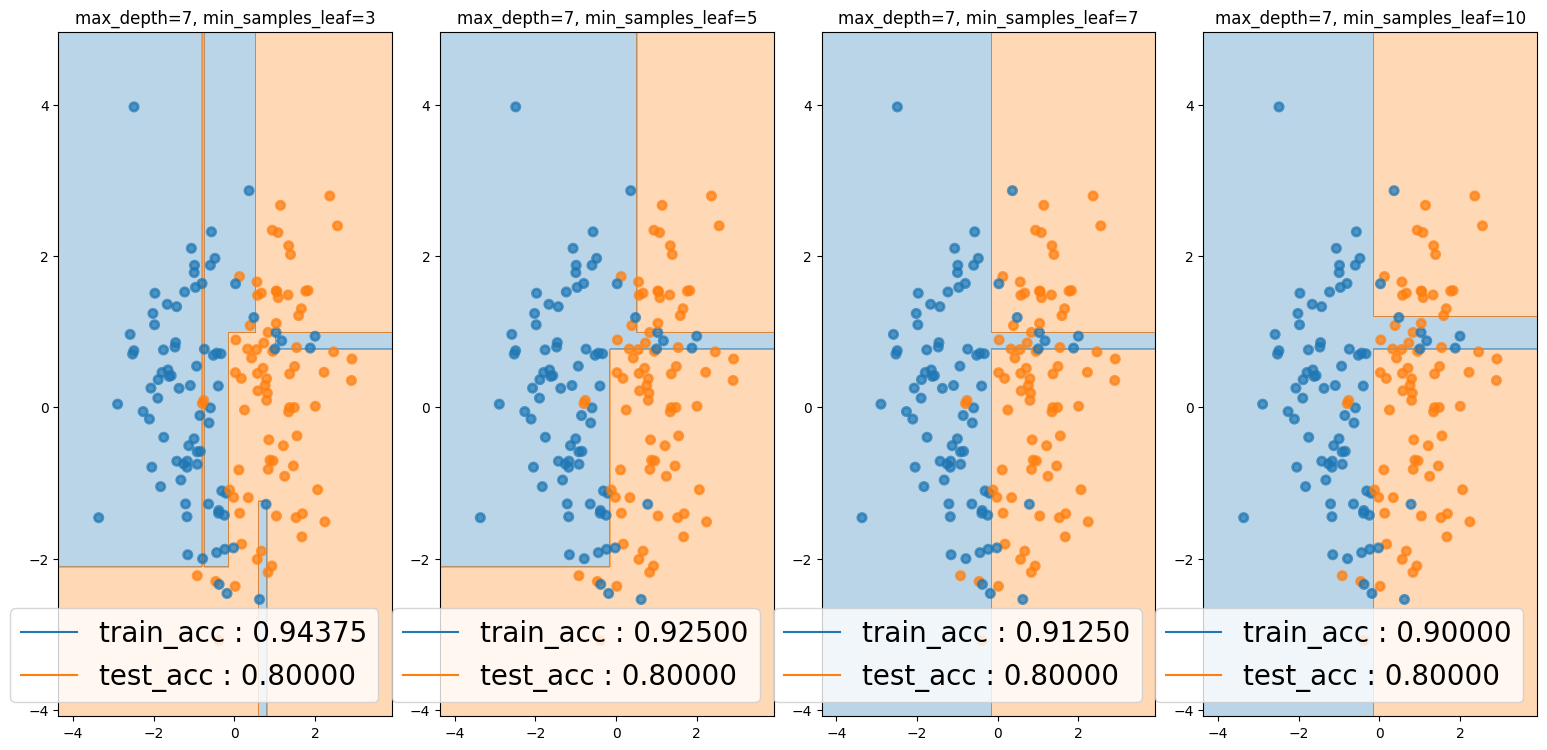

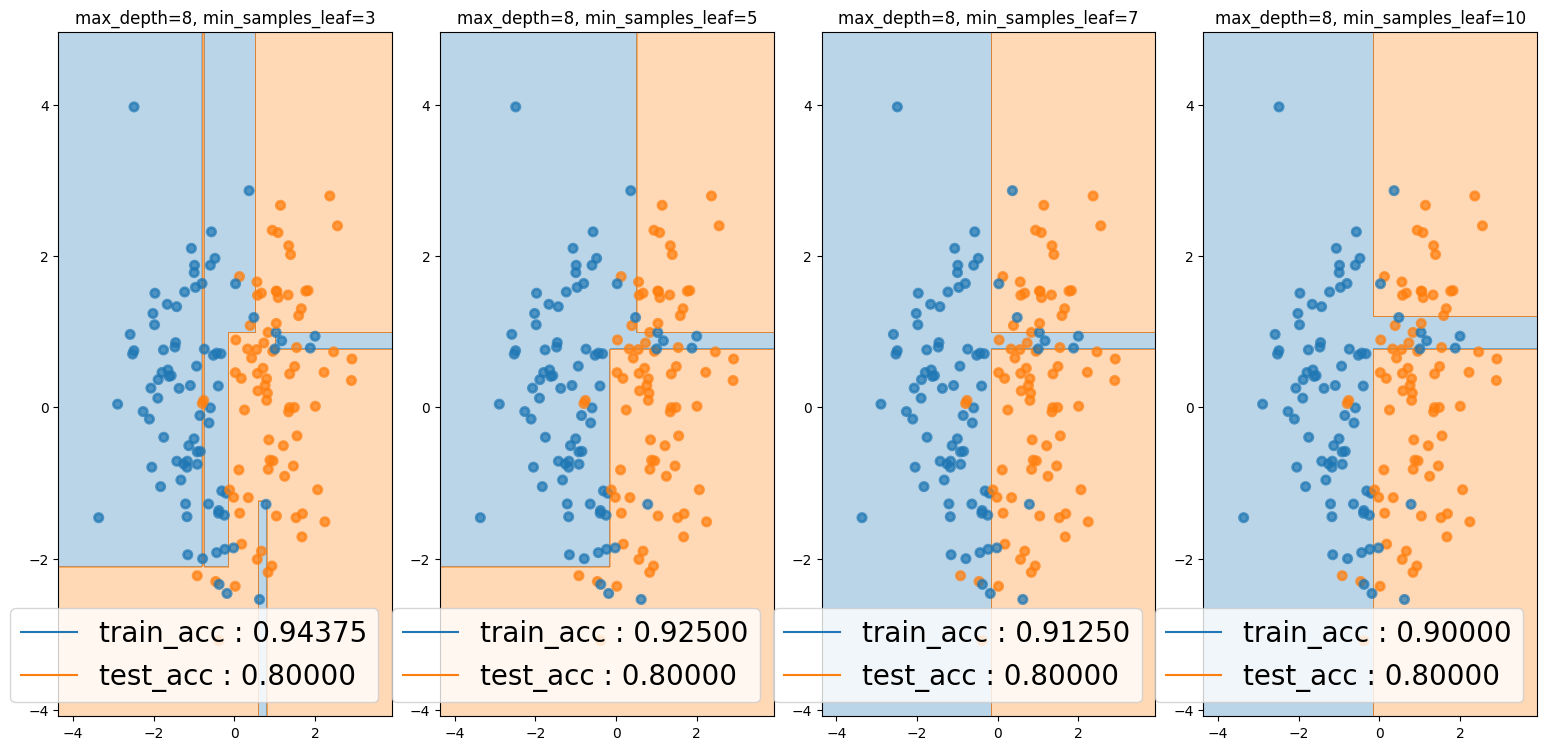

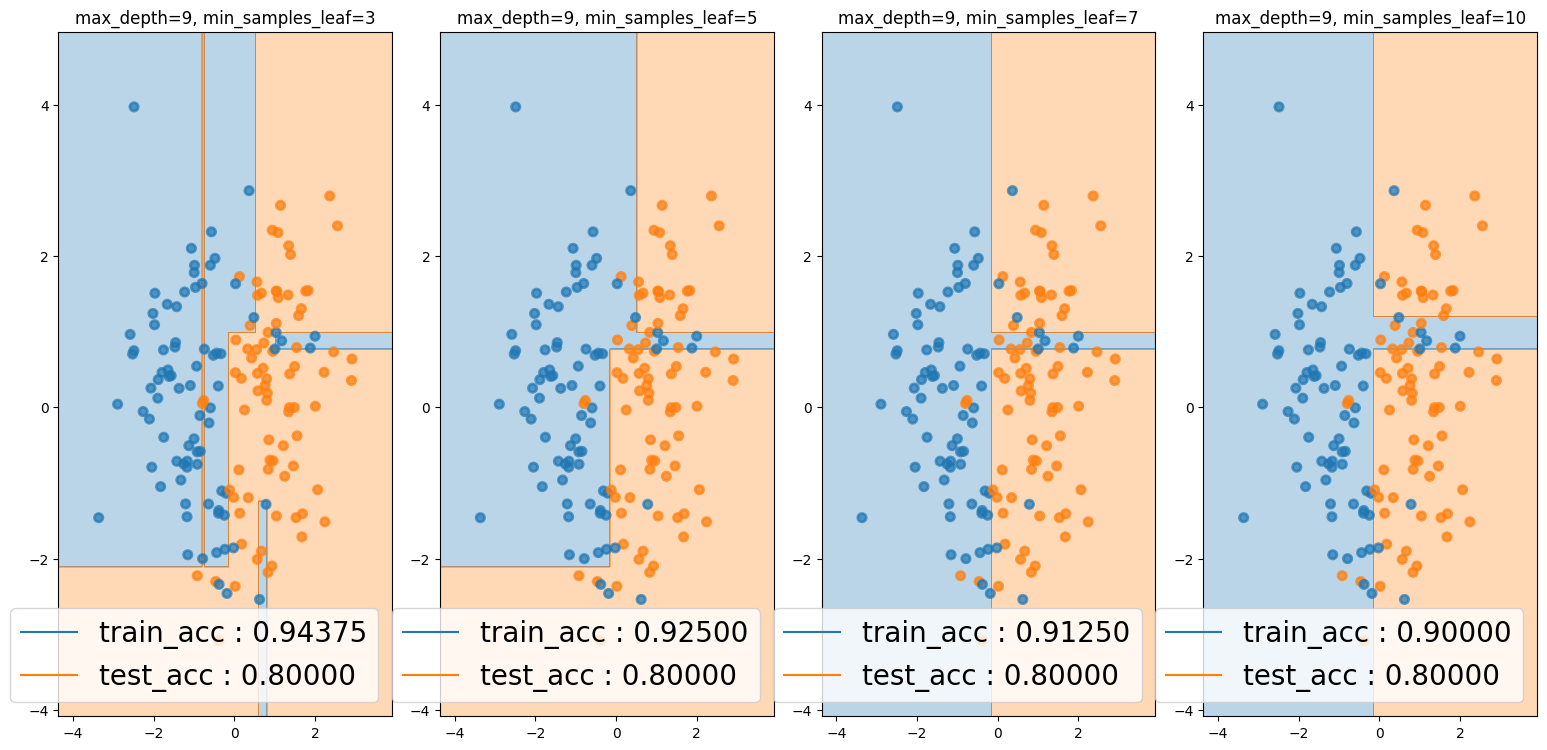

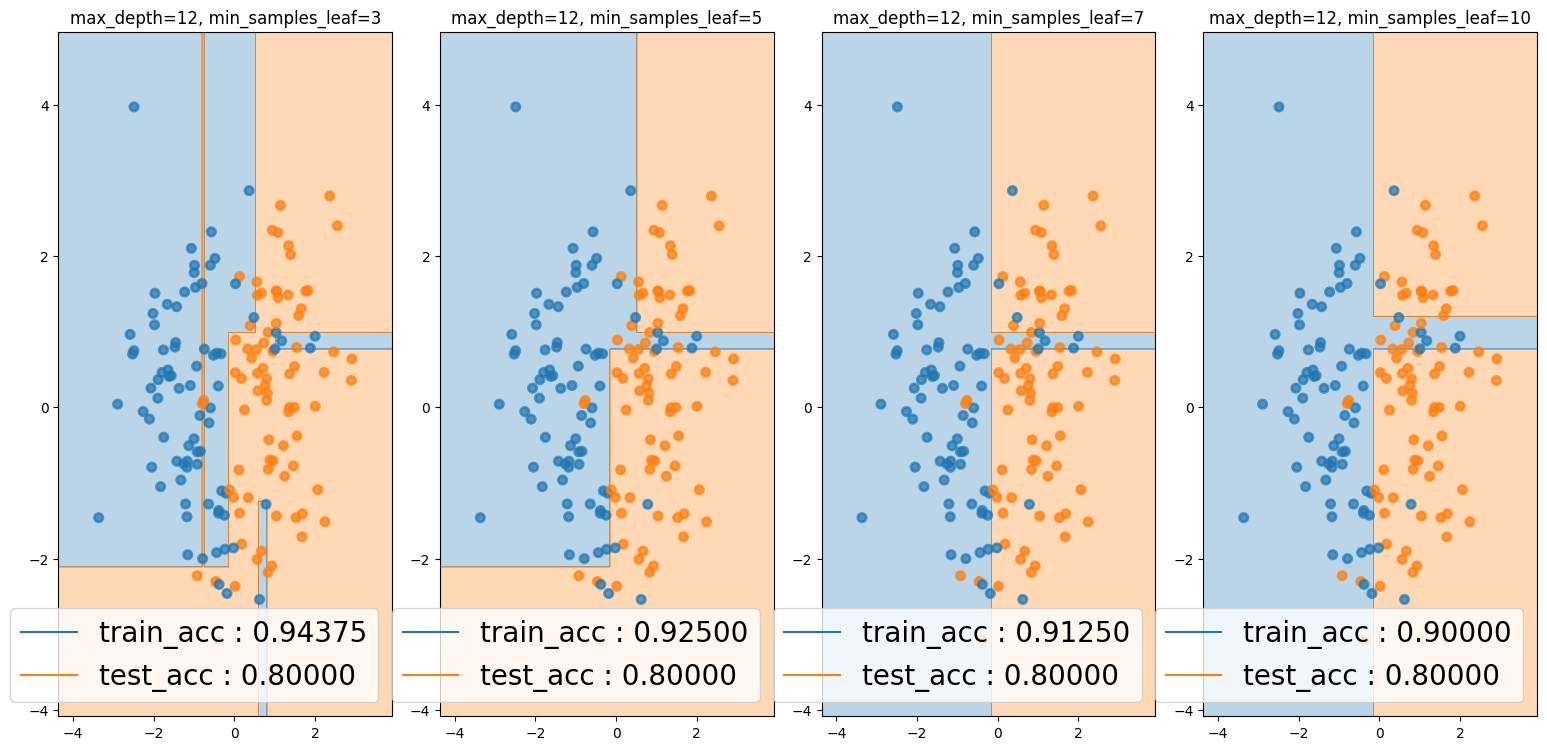

In [10]:
### Для разных комбинаций гиперпараметров
### Замерим качество и нарисуем поверхность

for max_depth in max_depth_set:

    i = 1

    f = plt.figure(figsize=(16, 8))

    for min_samples_leaf in min_samples_leaf_set:

        tree = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)

        ax = f.add_subplot(1, 4, i)

        train_acc = accuracy_score(y_train, tree.predict(X_train))
        test_acc = accuracy_score(y_test, tree.predict(X_test))

        plot_surface_axes(tree, X_train, y_train, ax, train_acc, test_acc)


        plt.title('max_depth={}, min_samples_leaf={}'.format(max_depth, min_samples_leaf))

        i+=1

__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")

    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self

    def transform(self, X, y=None):

        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)

        print("Трансформировали датасет!")
        return X_

In [12]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [13]:
from sklearn.pipeline import Pipeline

### Your code is here
pipe = Pipeline([('custom_transformer', CustomFunctionTransformer('x1', 'x2', lambda x, y: 2*x -y)),
                 ('tree', DecisionTreeClassifier(max_depth = 3))])
pipe.fit(X_train, y_train)






Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x7fc52d339bd0>,
                                           second_col='x2')),
                ('tree', DecisionTreeClassifier(max_depth=3))])

Трансформировали датасет!


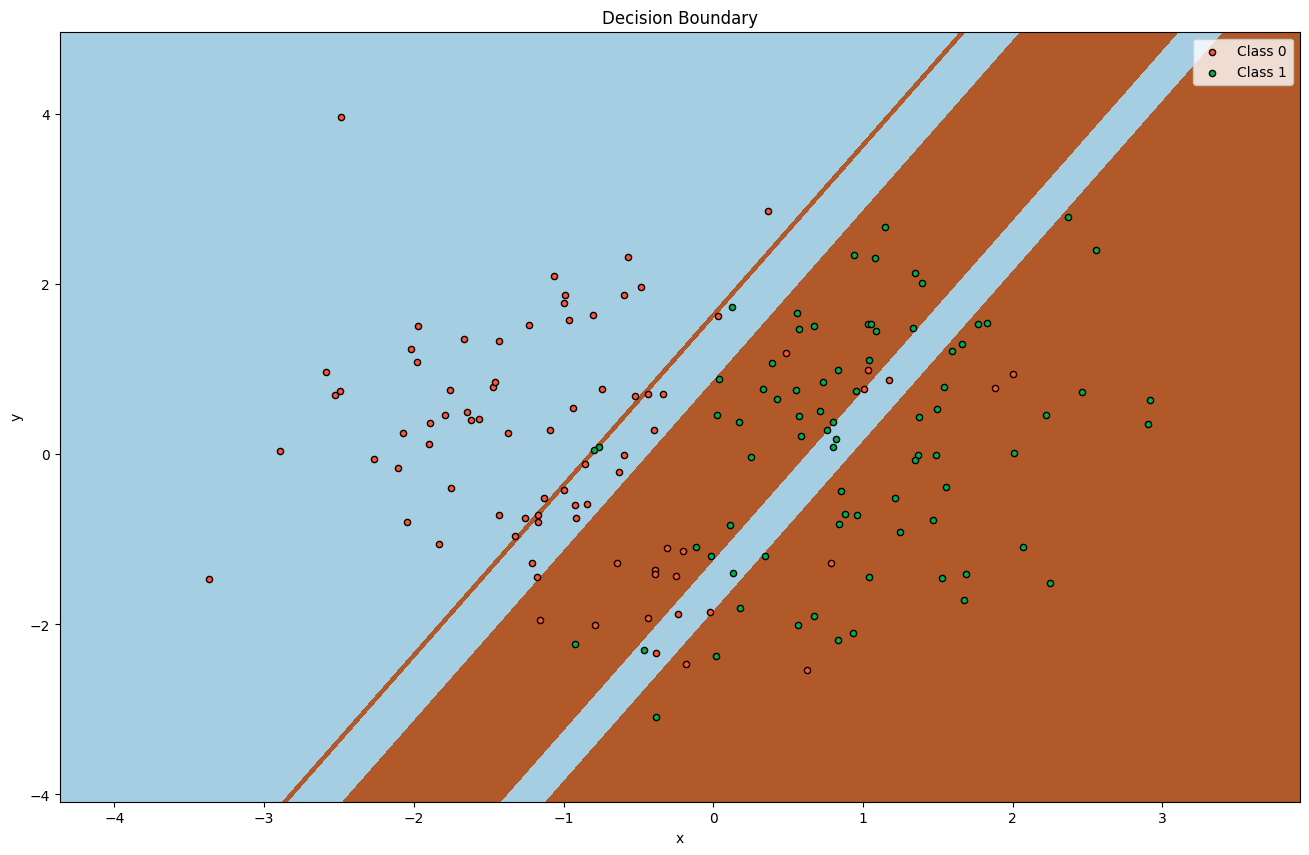

In [21]:
fig = plt.figure()
fig.set_size_inches(16, 10)

### Вычислим границы признакового пространства

pixel_step = 0.001

x1_min, x1_max = X_train.values[:, 0].min() - 1, X_train.values[:, 0].max() + 1
x2_min, x2_max = X_train.values[:, 1].min() - 1, X_train.values[:, 1].max() + 1

### Генерим много-много точек на плоскости

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### Для каждой точки даем прогноз, чтобы покрыть поверхности

Z = pipe.predict(pd.DataFrame(np.c_[xx1.ravel(), xx2.ravel()], columns=["x1", "x2"]))
Z = Z.reshape(xx1.shape)

# Заполняем пространство

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

### Рисуем точечки и обученные области

for i, n, c in zip(range(2), pipe.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y_train == i)
    plt.scatter(
        X_train.values[idx, 0],
        X_train.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")

plt.show()

In [23]:
print(f'train acc {accuracy_score(y_train, pipe.predict(X_train))} ')
print(f'test acc {accuracy_score(y_test, pipe.predict(X_test))} ')

Трансформировали датасет!
train acc 0.8625 
Трансформировали датасет!
test acc 0.75 
